# KMeans 기본 코드

비지도 학습은 **종속변수 없이** 컴퓨터가 데이터의 패턴/규칙을 찾아내는 방법으로 분석가의 주관이 많이 반영된다.

종속변수가 없다는 특성 때문에 학습이 끝난 후 평가가 어렵다.

## KMeans 클러스터링(군집)

- 각 군집의 평균(mean)을 활용하여 K개의 군집으로 묶는 알고리즘
- 데이터 전처리 단계에서 라벨링을 위해 사용하기도 함.

## #01. 준비작업

### [1] 패키지 가져오기

In [108]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### [2] 데이터 가져오기 - 게임 유저 군집화

게임 이용시간(time spent)과 레벨(game level)을 활용하여 4개의 군집으로 나누기

- 오래해서 잘하는 애
- 오래했는데도 못하는 애
- 잠깐 했는데 잘하는 애
- 잠깐 해서 못하는 애

In [109]:
origin = my_read_excel("https://data.hossam.kr/mldata/game_usage.xlsx")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   time spent  100 non-null    int64
 1   game level  100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB
None

데이터프레임 상위 5개 행
+----+--------------+--------------+
|    |   time spent |   game level |
|----+--------------+--------------|
|  0 |           39 |          944 |
|  1 |           55 |          705 |
|  2 |           29 |          757 |
|  3 |           59 |          999 |
|  4 |            7 |          109 |
+----+--------------+--------------+

데이터프레임 하위 5개 행
+----+--------------+--------------+
|    |   time spent |   game level |
|----+--------------+--------------|
| 95 |           47 |          939 |
| 96 |           50 |          485 |
| 97 |           13 |          916 |
| 98 |           79 |          235 |
| 99 |           48 |          338 |
+----+--------------+--------------+


## #02. 데이터 살펴보기

### [1] 게임 이용자의 시간과 레벨 분포 확인

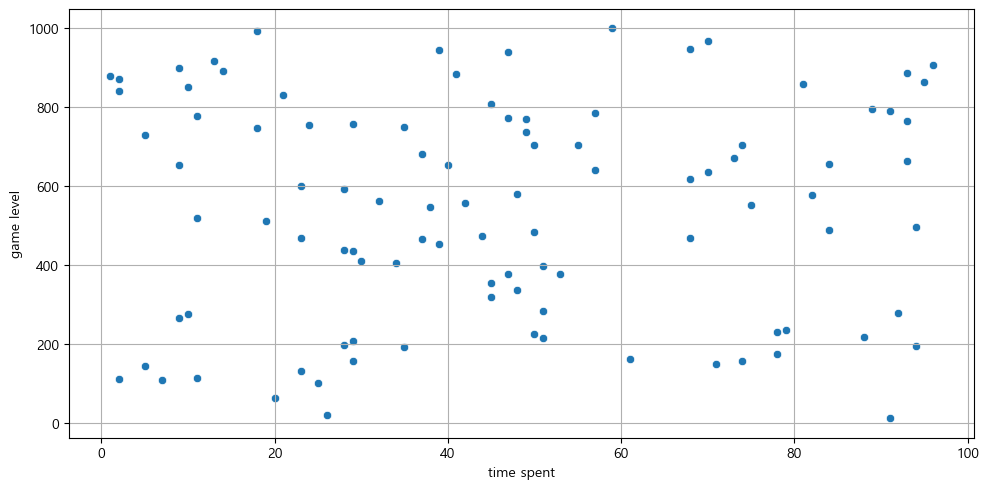

In [110]:
my_scatterplot(origin, xname='time spent', yname='game level')

## #03. 군집화 모델 

### [1] 하이퍼파라미터 설정

| 하이퍼파라미터 | 기본값 | 설명 | 추천값 |
|----------------|--------|------|--------|
| **`n_clusters`** | `8` | 군집의 개수. 데이터를 나눌 그룹의 수를 정의한다. | 데이터와 문제에 따라 다름 |
| **`init`** | `k-means++` | 초기 군집 중심점의 초기화 방법. `k-means++`, `random`, 또는 중심점 배열을 전달할 수 있다. | `k-means++`는 초기 중심점을 잘 선택하기 위한 방법으로 권장 |
| **`n_init`** | `10` | 서로 다른 군집 중심점의 초기화 수. 최적의 결과를 위해 알고리즘을 여러 번 실행한다. | 높은 값은 더 좋은 결과를 가져올 수 있지만 계산 시간이 증가 |
| `max_iter` | `300` | 최대 반복 횟수. 한 번 실행 시 알고리즘이 수렴하기 위해 반복하는 최대 횟수 | 데이터 크기나 복잡도에 따라 조정할 수 있으나, 기본값이 대부분의 경우에 적합 |
| `tol` | `1e-4` | 수렴을 위한 상대적 인내도. 이 값 이하로 센터로이드의 이동이 감소하면, 알고리즘이 종료된다. | 작은 값은 더 정확한 수렴을 의미하지만 계산 시간이 길어질 수 있음 |
| **`algorithm`** | `lloyd` | 군집 알고리즘을 선택한다. 'lloyd', 'elkan' 중 선택 가능. | 데이터셋의 특성에 따라 'lloyd'이나 'elkan'을 선택 |
| **`random_stateint`** | `None` | 중심 초기화를 위한 난수 생성을 결정 |  |

.

> algorithm 파라미터의 경우 이전 버전에서 사용되던 `full`의 이름이 `lloyd`로 변경되고 `auto`값은 `lloyd`를 사용하는 것으로 변경됨
>
> init의 경우 `np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])`와 같이 직접 중심점을 설정해 줄 수 있다.

In [111]:
# 모델 객체 생성
estimator = KMeans(n_clusters=4, random_state=0)

# 모델 학습
estimator.fit(origin)

# 예측
cluster = estimator.predict(origin)
cluster

array([0, 3, 0, 0, 1, 0, 2, 2, 1, 2, 0, 3, 1, 3, 0, 1, 0, 1, 0, 3, 3, 0,
       1, 3, 1, 0, 3, 1, 2, 3, 3, 0, 2, 1, 0, 3, 2, 1, 1, 0, 2, 0, 0, 3,
       0, 3, 0, 2, 0, 1, 2, 1, 1, 1, 2, 0, 1, 3, 0, 2, 1, 3, 3, 3, 2, 0,
       2, 1, 2, 3, 0, 2, 1, 1, 0, 1, 0, 0, 1, 3, 1, 3, 2, 0, 1, 3, 0, 2,
       1, 1, 0, 3, 2, 3, 0, 0, 2, 0, 1, 2])

### [2] 결과를 포함하는 데이터프레임 생성

In [112]:
df = origin.copy()
df['cluster'] = cluster
df

,time spent,game level,cluster
0,39,944,0
1,55,705,3
2,29,757,0
3,59,999,0
4,7,109,1
...,...,...,...
95,47,939,0
96,50,485,2
97,13,916,0
98,79,235,1


### [3] 결과 시각화

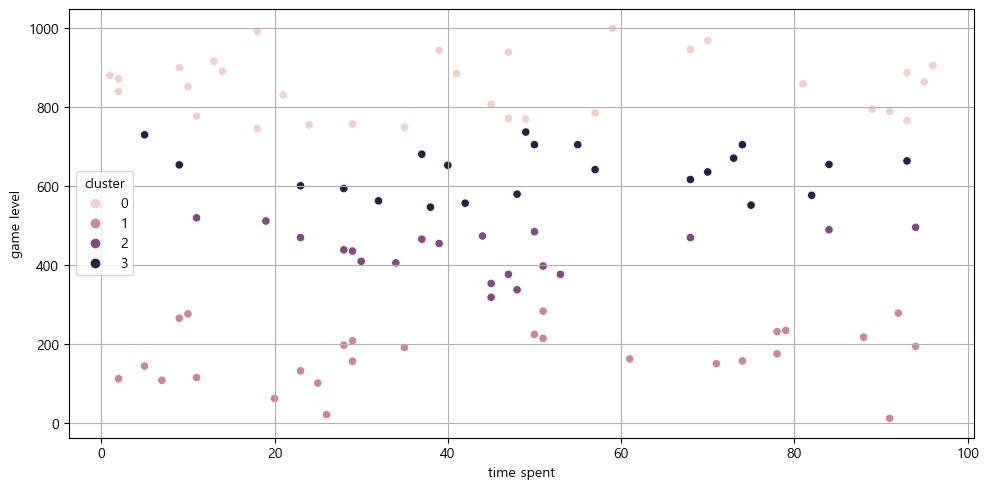

In [113]:
my_scatterplot(df, xname='time spent', yname='game level', hue='cluster')

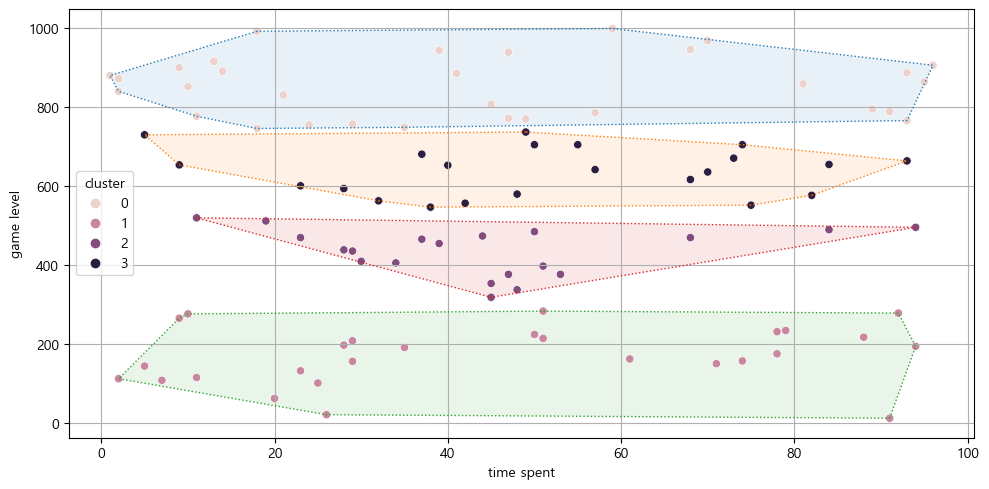

In [114]:
my_convex_hull(df, xname='time spent', yname='game level', hue='cluster')

## #04. 데이터 표준화 적용

![img](res/sc.png)

### [1] 표준화 되지 않은 원본 데이터를 x와 y축에 대하여 같은 범위로 설정하고 시각화

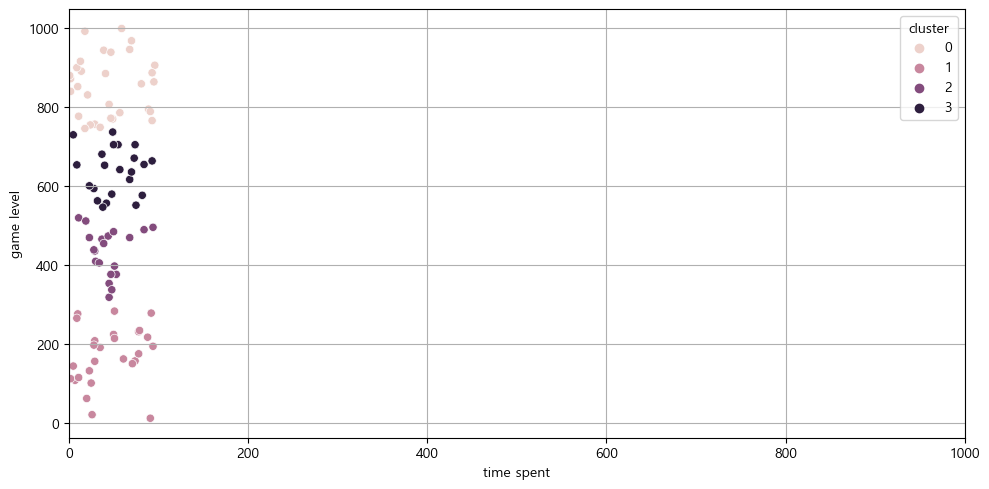

In [115]:
my_scatterplot(df, xname='time spent', yname='game level', hue='cluster', callback=lambda ax: ax.set_xlim([0, 1000]))

### [2] 데이터 스케일링에 대한 군집화

#### (1) Standard Scaler

In [116]:
df2 = my_standard_scaler(origin)
df2

,time spent,game level
0,-0.250733,1.474805
1,0.326494,0.606546
2,-0.611500,0.795456
3,0.470801,1.674613
4,-1.405187,-1.558652
...,...,...
95,0.037881,1.456640
96,0.146111,-0.192688
97,-1.188727,1.373084
98,1.192335,-1.100909


#### (2) 군집화

In [117]:
# 모델 객체 생성
estimator = KMeans(n_clusters=4, random_state=0)

# 모델 학습
estimator.fit(df2)

# 예측
cluster = estimator.predict(df2)
cluster

array([0, 3, 0, 3, 2, 0, 2, 2, 1, 2, 0, 3, 2, 0, 3, 2, 3, 2, 0, 0, 3, 3,
       1, 3, 2, 0, 0, 2, 2, 0, 3, 0, 1, 2, 3, 0, 2, 1, 2, 0, 2, 3, 0, 3,
       3, 0, 0, 2, 3, 1, 1, 1, 1, 2, 3, 0, 2, 0, 3, 3, 1, 0, 3, 0, 2, 0,
       2, 1, 2, 0, 0, 1, 2, 1, 3, 1, 0, 0, 2, 0, 2, 3, 2, 0, 1, 3, 0, 2,
       2, 1, 0, 3, 1, 0, 3, 0, 1, 0, 1, 1])

#### (3) 결과를 포함하는 데이터프레임 생성

In [118]:
df3 = df2.copy()
df3['cluster'] = cluster
df3

,time spent,game level,cluster
0,-0.250733,1.474805,0
1,0.326494,0.606546,3
2,-0.611500,0.795456,0
3,0.470801,1.674613,3
4,-1.405187,-1.558652,2
...,...,...,...
95,0.037881,1.456640,0
96,0.146111,-0.192688,1
97,-1.188727,1.373084,0
98,1.192335,-1.100909,1


#### (4) 결과 시각화

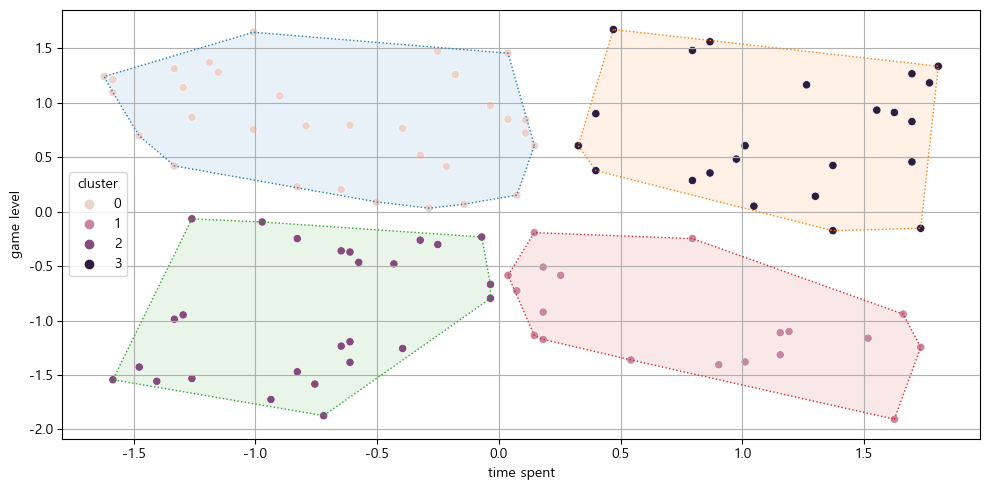

In [119]:
my_convex_hull(df3, xname='time spent', yname='game level', hue='cluster')

### [3] MinMaxScaler

#### (1) 스케일링

In [120]:
scaler = MinMaxScaler()
#scaler.fit(origin)
#n_data = scaler.transform(origin)
n_data = scaler.fit_transform(origin)

print("각 열의 평균: ", n_data[:, 0].mean(), n_data[:, 1].mean())
print("각 열의 최소값: ", n_data[:, 0].min(), n_data[:, 1].min())
print("각 열의 최대값: ", n_data[:, 0].max(), n_data[:, 1].max())

각 열의 평균:  0.4731578947368421 0.5324949290060852
각 열의 최소값:  0.0 0.0
각 열의 최대값:  1.0 1.0


#### (2) 군집화 및 결과 확인

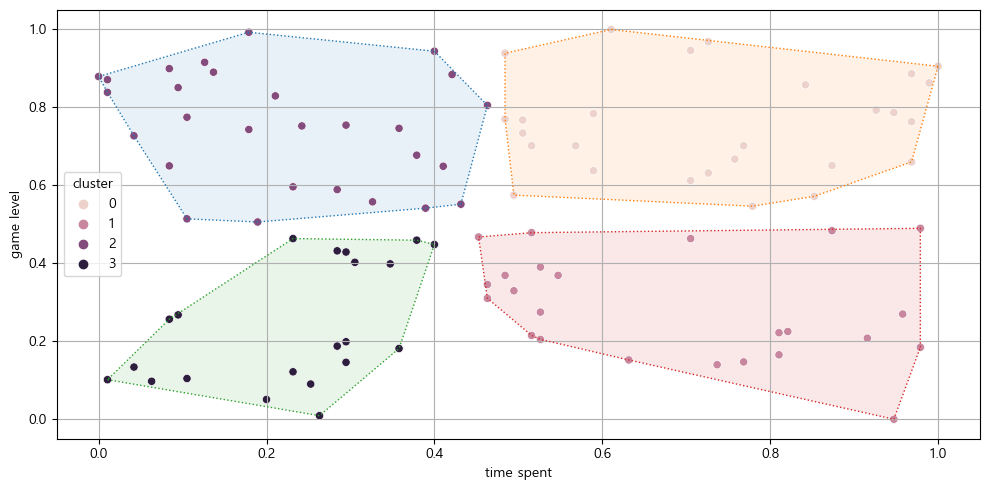

In [121]:
estimator = KMeans(n_clusters=4, random_state=0)
estimator.fit(n_data)
cluster = estimator.predict(n_data)

df4 = DataFrame(n_data, columns=origin.columns, index=origin.index)
df4['cluster'] = cluster

my_convex_hull(df4, xname='time spent', yname='game level', hue='cluster')